In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [448]:
df = pd.read_csv("/Users/mayurimamdi/Downloads/archive-4/all_commodities_data.csv")

In [449]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
0,GC=F,Gold,2000-08-30,273.899994,273.899994,273.899994,273.899994,0
1,GC=F,Gold,2000-08-31,274.799988,278.299988,274.799988,278.299988,0
2,GC=F,Gold,2000-09-01,277.000000,277.000000,277.000000,277.000000,0
3,GC=F,Gold,2000-09-05,275.799988,275.799988,275.799988,275.799988,2
4,GC=F,Gold,2000-09-06,274.200012,274.200012,274.200012,274.200012,0


In [450]:
df['commodity'].value_counts()

commodity
Copper       5979
Silver       5976
Gold         5975
Palladium    5683
Platinum     5443
Name: count, dtype: int64

In [451]:
df['date']=pd.to_datetime(df['date'])

In [452]:
df = df.sort_values('date')

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 11951 to 29055
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     29056 non-null  object        
 1   commodity  29056 non-null  object        
 2   date       29056 non-null  datetime64[ns]
 3   open       29056 non-null  float64       
 4   high       29056 non-null  float64       
 5   low        29056 non-null  float64       
 6   close      29056 non-null  float64       
 7   volume     29056 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.0+ MB


In [454]:
df.head()

,ticker,commodity,date,open,high,low,close,volume
11951,PL=F,Platinum,2000-01-04,428.0,430.0,421.000000,429.700012,632
23373,PA=F,Palladium,2000-01-04,445.0,446.0,439.000000,441.899994,177
23374,PA=F,Palladium,2000-01-05,436.0,439.0,433.000000,438.100006,319
11952,PL=F,Platinum,2000-01-05,428.0,428.0,416.899994,419.899994,571
23375,PA=F,Palladium,2000-01-06,434.5,437.0,430.200012,435.299988,180


In [455]:
df['year'] = df['date'].dt.year

In [456]:
df['month'] = df['date'].dt.month

In [457]:
df['day'] = df['date'].dt.day

In [458]:
df.head()

,ticker,commodity,date,open,high,low,close,volume,year,month,day
11951,PL=F,Platinum,2000-01-04,428.0,430.0,421.000000,429.700012,632,2000,1,4
23373,PA=F,Palladium,2000-01-04,445.0,446.0,439.000000,441.899994,177,2000,1,4
23374,PA=F,Palladium,2000-01-05,436.0,439.0,433.000000,438.100006,319,2000,1,5
11952,PL=F,Platinum,2000-01-05,428.0,428.0,416.899994,419.899994,571,2000,1,5
23375,PA=F,Palladium,2000-01-06,434.5,437.0,430.200012,435.299988,180,2000,1,6


In [459]:
gold_df = df[df['commodity'] == 'Gold'][['date', 'close']]
gold_df.set_index('date', inplace=True)


In [460]:
gold_df.head()

,close
date,
2000-08-30,273.899994
2000-08-31,278.299988
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012


In [461]:
gold = df[df['commodity'] == 'Gold'][['date', 'close']].copy()

gold['date'] = pd.to_datetime(gold['date'])
gold = gold.sort_values('date')
gold = gold.set_index('date')


In [521]:
gold_m = gold['close'].resample('M').mean()


/var/folders/ph/wg0wr1gs4qs24s_3z3tp0pj80000gn/T/ipykernel_58638/2886553121.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gold_m = gold['close'].resample('M').mean()


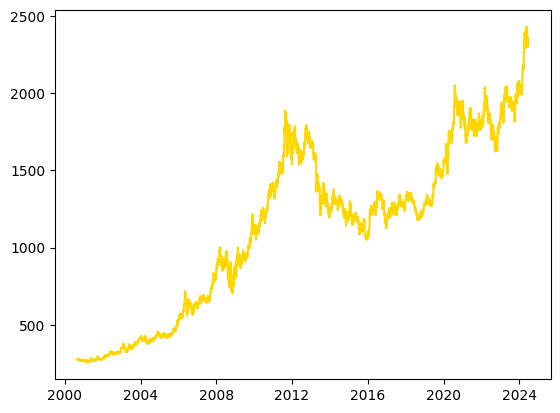

In [462]:
plt.plot(gold_df, label='Gold Close Price', color='gold')

Observation : Golds data seems like a trend 

In [463]:
df_silver=df[df['commodity']=='Silver']

<Axes: xlabel='date', ylabel='close'>

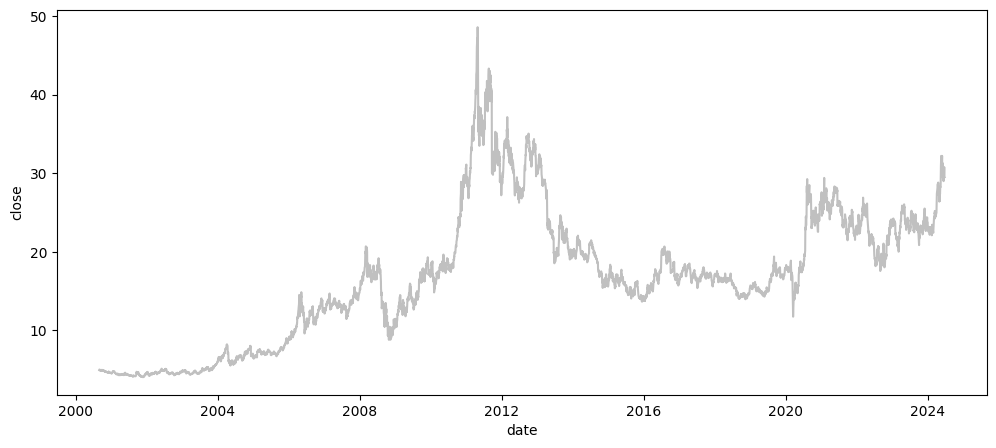

In [464]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df_silver, x='date', y='close', color='silver')

Observation : 2010-2011 year was the highest 

In [465]:
plat_df=df[df['commodity']=='Platinum']

<Axes: xlabel='date', ylabel='close'>

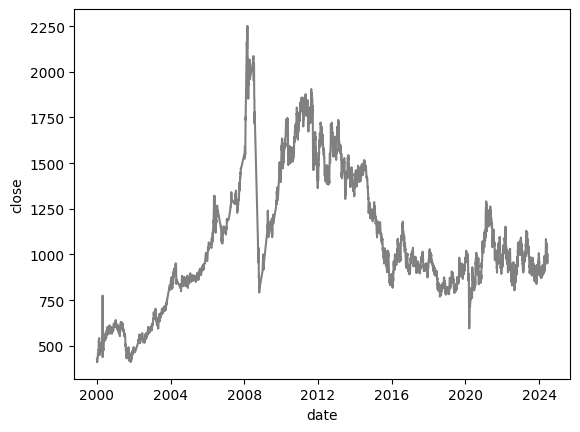

In [466]:
sns.lineplot(data=plat_df, x='date', y='close', color='gray')

Observation : 2008 year was the most volatile of all the years 

<Axes: xlabel='date', ylabel='close'>

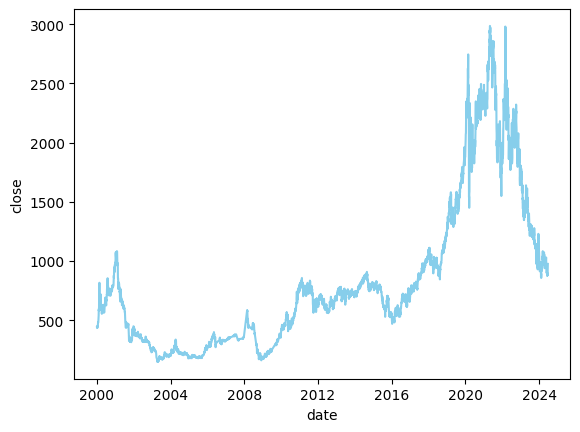

In [467]:
palla_df=df[df['commodity']=='Palladium']
sns.lineplot(data=palla_df, x='date', y='close', color='skyblue')

In [468]:
df['commodity'].unique()

array(['Platinum', 'Palladium', 'Gold', 'Silver', 'Copper'], dtype=object)

In [469]:
df_de = df[df['commodity'] == 'Gold'].copy()


In [470]:
df_de['date'] = pd.to_datetime(df_de['date'])
df_de = df_de.set_index('date').sort_index()


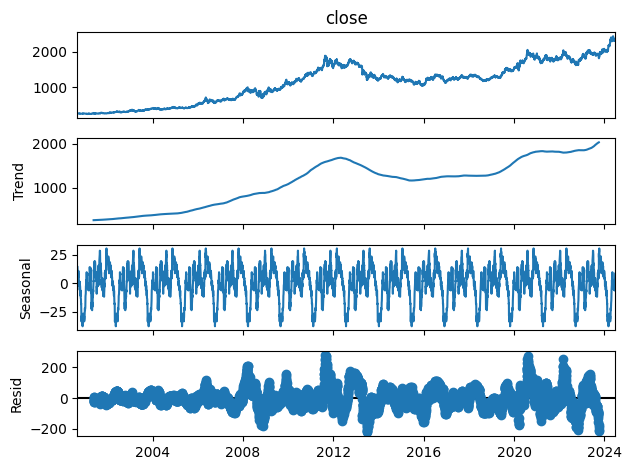

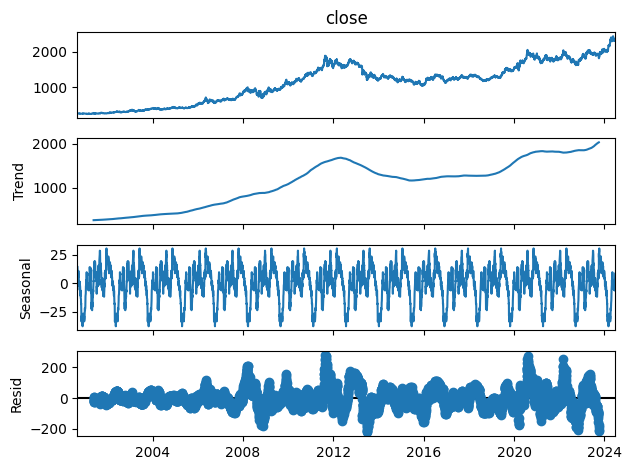

In [471]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df_de['close'], model='additive', period=365)
decomp.plot()


Observation :  There is also seasonality on Gold from 2000-2024

Lets do the same for silver and platinum 

In [472]:
sil_df=df[df['commodity']=='Silver'].copy()


In [473]:
sil_df['date']= pd.to_datetime(sil_df['date'])
sil_df= sil_df.set_index('date').sort_index()

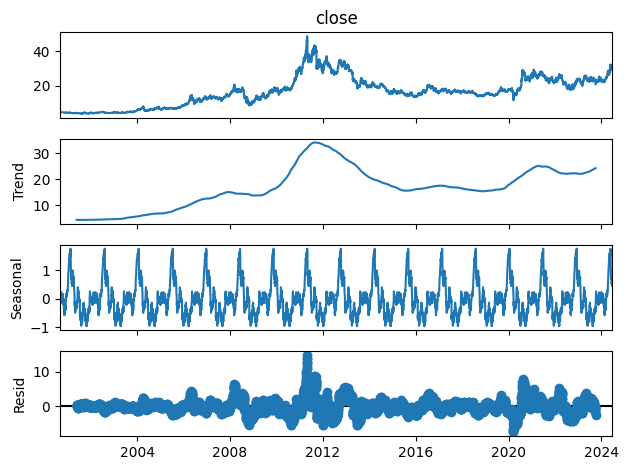

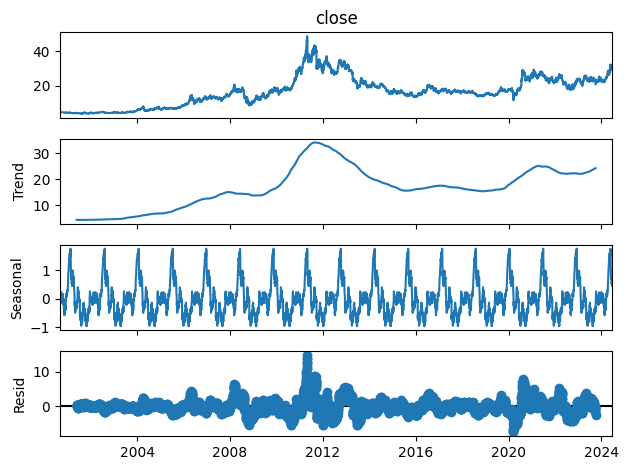

In [474]:
decomp= seasonal_decompose(sil_df['close'], model='additive', period=365)
decomp.plot()

Observation : there is also seasonality in silver 

In [475]:
df_pla= df[df['commodity']=='Platinum'].copy()
df_pla['date']= pd.to_datetime(df_pla['date'])
df_pla= df_pla.set_index('date').sort_index()	

In [476]:
decomp_pla= seasonal_decompose(df_pla['close'], model= ' additive', period=365)

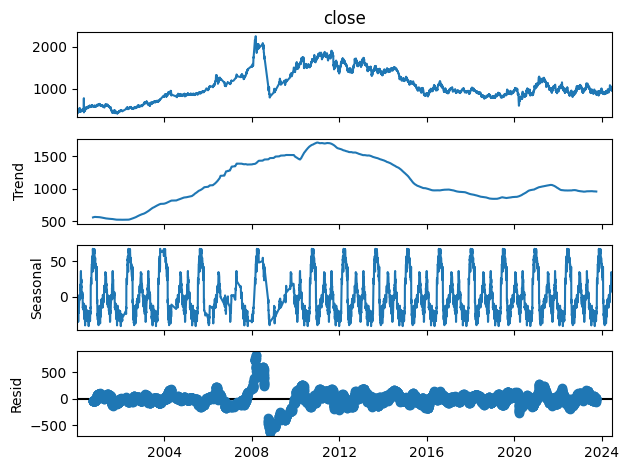

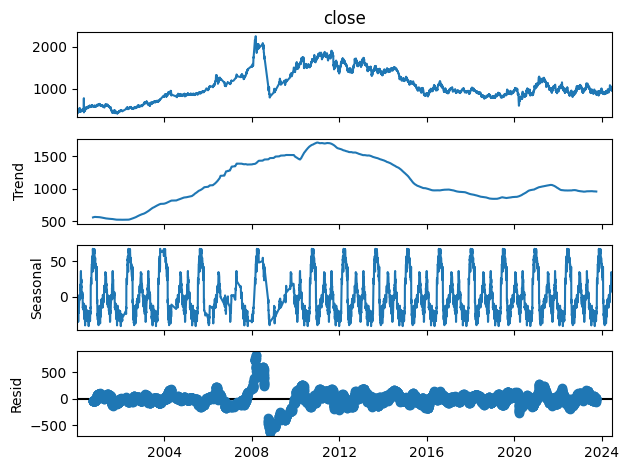

In [477]:
decomp_pla.plot()

Observation : Platinum exhibits a clear seasonal pattern over time; however, there is a notable structural break around 2008. This suggests that while seasonality is present, external economic or market specific events also significantly influenced prices during this period.

Text(0.5, 1.0, 'Platinum Price with Structural Break Marked')

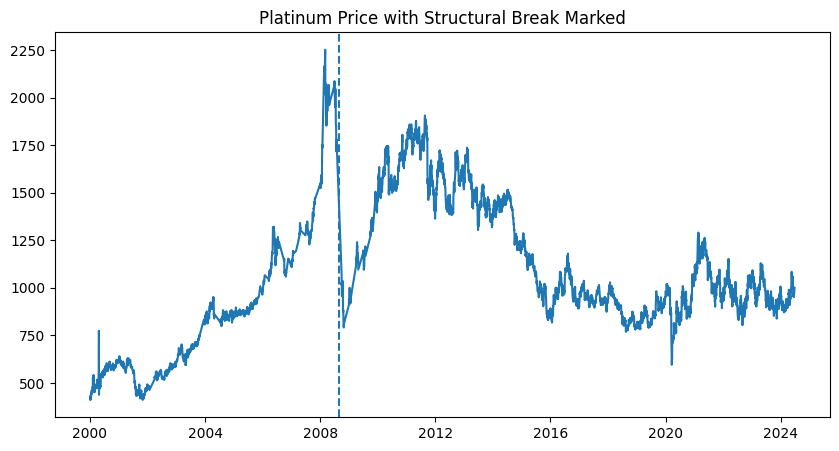

In [478]:
plt.figure(figsize=(10,5))
plt.plot(df_pla['close'])
plt.axvline(pd.to_datetime('2008-09-01'), linestyle='--')
plt.title("Platinum Price with Structural Break Marked")


In [479]:
monthly = (df[ (df['year']==2008) & (df['commodity']=='Platinum')].groupby('month')['close'].mean())

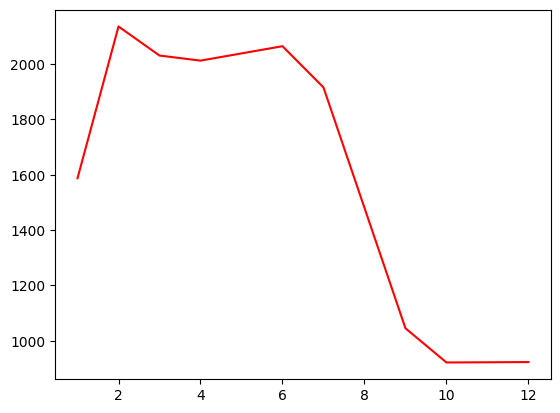

In [480]:
plt.plot(monthly.index, monthly.values, color='red')

#### Feature Engineering

In [481]:
df.head()

,ticker,commodity,date,open,high,low,close,volume,year,month,day
11951,PL=F,Platinum,2000-01-04,428.0,430.0,421.000000,429.700012,632,2000,1,4
23373,PA=F,Palladium,2000-01-04,445.0,446.0,439.000000,441.899994,177,2000,1,4
23374,PA=F,Palladium,2000-01-05,436.0,439.0,433.000000,438.100006,319,2000,1,5
11952,PL=F,Platinum,2000-01-05,428.0,428.0,416.899994,419.899994,571,2000,1,5
23375,PA=F,Palladium,2000-01-06,434.5,437.0,430.200012,435.299988,180,2000,1,6


In [482]:
df['ticker'].unique()

array(['PL=F', 'PA=F', 'GC=F', 'SI=F', 'HG=F'], dtype=object)

In [483]:
df['commodity'].unique()

array(['Platinum', 'Palladium', 'Gold', 'Silver', 'Copper'], dtype=object)

In [484]:
gold_df = df[df['commodity'] == 'Gold'].copy()


In [485]:
silver_df = df[df['commodity'] == 'Silver'].copy()
platinum_df = df[df['commodity'] == 'Platinum'].copy()
palladium_df = df[df['commodity'] == 'Palladium'].copy()
copper_df = df[df['commodity'] == 'Copper'].copy()

In [486]:
df.drop(columns=['ticker'], inplace=True)

In [487]:
df.drop(columns=['date'], inplace=True)

In [488]:
df = pd.get_dummies(df, columns=['commodity'],dtype=int)
df.head()

,open,high,low,close,volume,year,month,day,commodity_Copper,commodity_Gold,commodity_Palladium,commodity_Platinum,commodity_Silver
11951,428.0,430.0,421.000000,429.700012,632,2000,1,4,0,0,0,1,0
23373,445.0,446.0,439.000000,441.899994,177,2000,1,4,0,0,1,0,0
23374,436.0,439.0,433.000000,438.100006,319,2000,1,5,0,0,1,0,0
11952,428.0,428.0,416.899994,419.899994,571,2000,1,5,0,0,0,1,0
23375,434.5,437.0,430.200012,435.299988,180,2000,1,6,0,0,1,0,0


In [489]:
df = df.drop(columns=['high', 'low','day','open'])

In [490]:
X = df.drop(columns=['close'])  
y = df['close']                  


In [491]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29056 entries, 11951 to 29055
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   close                29056 non-null  float64
 1   volume               29056 non-null  int64  
 2   year                 29056 non-null  int32  
 3   month                29056 non-null  int32  
 4   commodity_Copper     29056 non-null  int64  
 5   commodity_Gold       29056 non-null  int64  
 6   commodity_Palladium  29056 non-null  int64  
 7   commodity_Platinum   29056 non-null  int64  
 8   commodity_Silver     29056 non-null  int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 2.0 MB


In [493]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [494]:
cor=df.corr()

<Axes: >

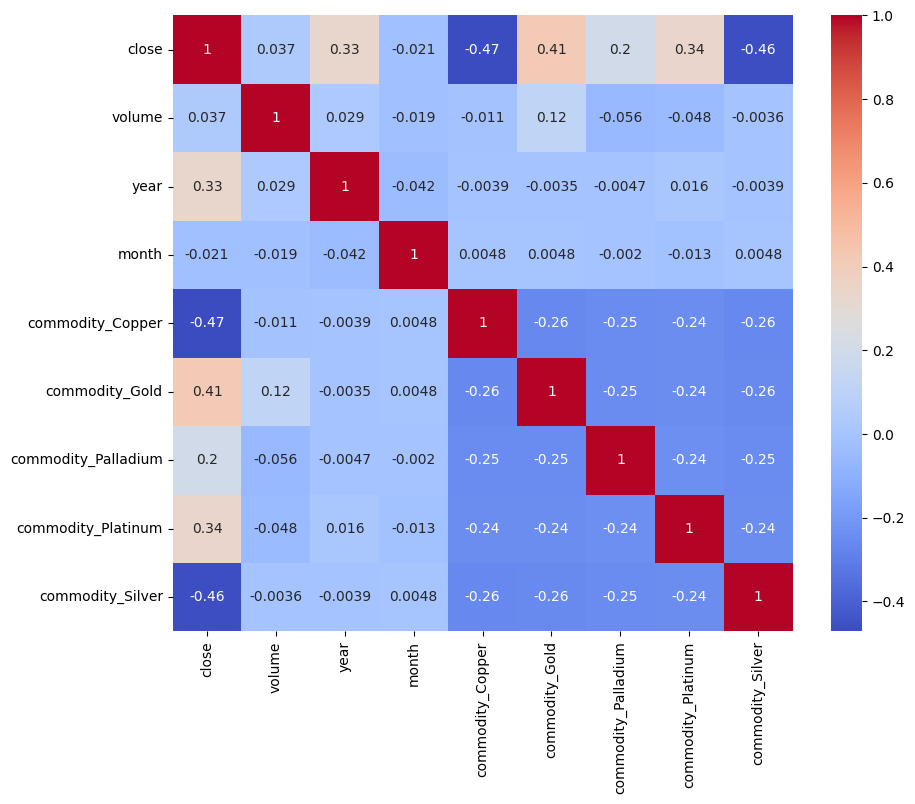

In [495]:
plt.figure(figsize=(10,8))
sns.heatmap(cor, annot=True, cmap='coolwarm')

In [496]:
co=X_train.corr()

<Axes: >

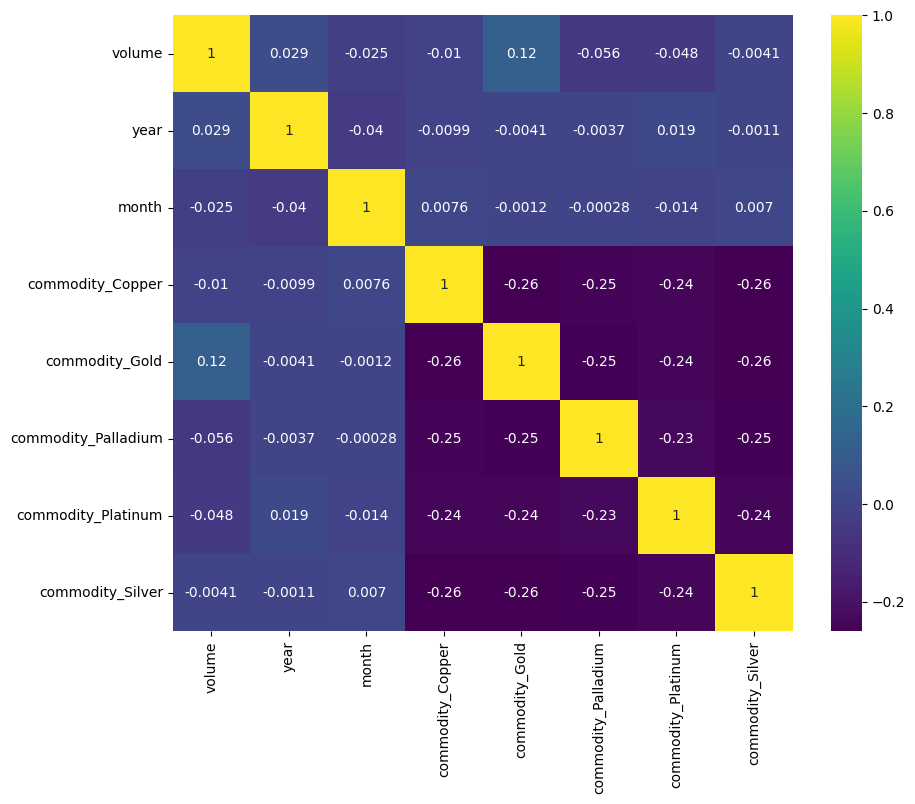

In [497]:
plt.figure(figsize=(10,8))
sns.heatmap(co, annot=True, cmap='viridis')

In [498]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected features:", selected_features)
fr = pd.Series(selector.scores_, index=X.columns)
fr = fr.sort_values(ascending=False)
print(fr)



Selected features: Index(['volume', 'year', 'month', 'commodity_Copper', 'commodity_Gold',
       'commodity_Palladium', 'commodity_Platinum', 'commodity_Silver'],
      dtype='object')
commodity_Copper       8309.641510
commodity_Silver       7816.117451
commodity_Gold         6026.465886
commodity_Platinum     3727.052390
year                   3615.674219
commodity_Palladium    1158.427371
volume                   40.152701
month                    13.066272
dtype: float64


In [499]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)
print(mi_series)

year                   1.412966
commodity_Copper       0.480501
commodity_Silver       0.480080
volume                 0.307979
month                  0.238497
commodity_Palladium    0.227644
commodity_Gold         0.222031
commodity_Platinum     0.208428
dtype: float64


In [500]:
X.head()

,volume,year,month,commodity_Copper,commodity_Gold,commodity_Palladium,commodity_Platinum,commodity_Silver
11951,632,2000,1,0,0,0,1,0
23373,177,2000,1,0,0,1,0,0
23374,319,2000,1,0,0,1,0,0
11952,571,2000,1,0,0,0,1,0
23375,180,2000,1,0,0,1,0,0


In [501]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [502]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.7115224592464174
RMSE: 347.40226546972923


In [503]:
from sklearn.metrics import r2_score

print("Train R²:", r2_score(y_train, model.predict(X_train)))
print("Test R² :", r2_score(y_test, model.predict(X_test)))


Train R²: 0.7118873927360811
Test R² : 0.7115224592464174


In [504]:
gold_df['lag_1']  = gold_df['close'].shift(1)
gold_df['lag_7']  = gold_df['close'].shift(7)
gold_df['lag_30'] = gold_df['close'].shift(30)

gold_df['roll_mean_7'] = gold_df['close'].rolling(7).mean()
gold_df['roll_std_7']  = gold_df['close'].rolling(7).std()


In [505]:
gold_df = gold_df.dropna()


In [506]:
X = gold_df[['lag_1', 'lag_7', 'lag_30',
             'roll_mean_7', 'roll_std_7']]
y = gold_df['close']

In [507]:
train_size = int(len(gold_df) * 0.8)

X_train = X.iloc[:train_size]
X_test  = X.iloc[train_size:]

y_train = y.iloc[:train_size]
y_test  = y.iloc[train_size:]


In [508]:
naive_pred = X_test['lag_1']


In [509]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


In [510]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(y_true, y_pred, name):
    print(f"{name} MAE :", mean_absolute_error(y_true, y_pred))
    print(f"{name} RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print()

evaluate(y_test, naive_pred, "Naive")
evaluate(y_test, lr_pred, "Linear Regression")


Naive MAE : 13.331538656762511
Naive RMSE: 18.613749842122076

Linear Regression MAE : 13.014745450753589
Linear Regression RMSE: 18.219763040106738



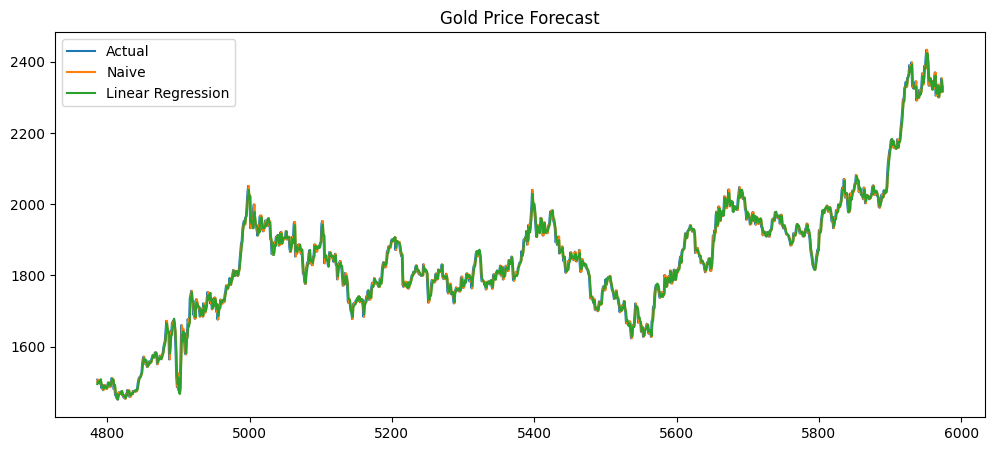

In [511]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, naive_pred, label='Naive')
plt.plot(y_test.index, lr_pred, label='Linear Regression')
plt.legend()
plt.title('Gold Price Forecast')
plt.show()


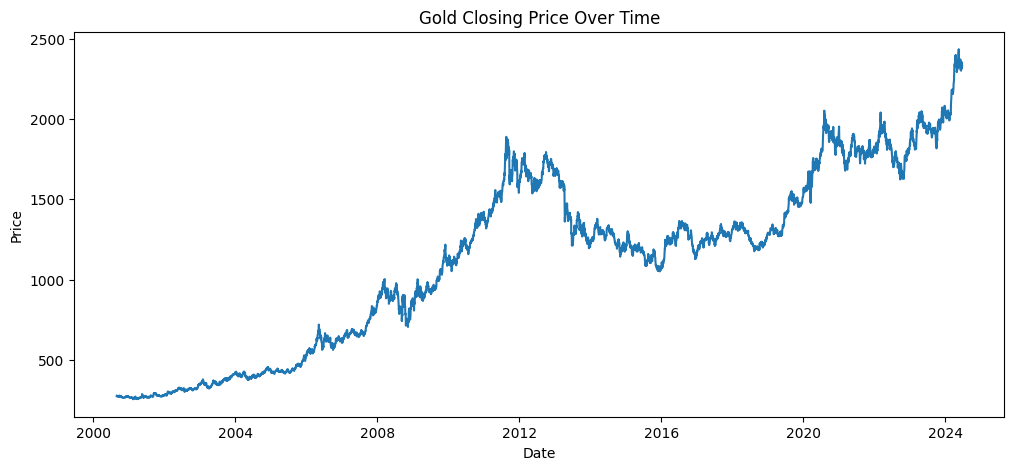

In [520]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(gold['close'])
plt.title('Gold Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
train = gold_m[:-24]   
test  = gold_m[-24:]


In [523]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()


In [524]:
forecast = model_fit.forecast(steps=24)


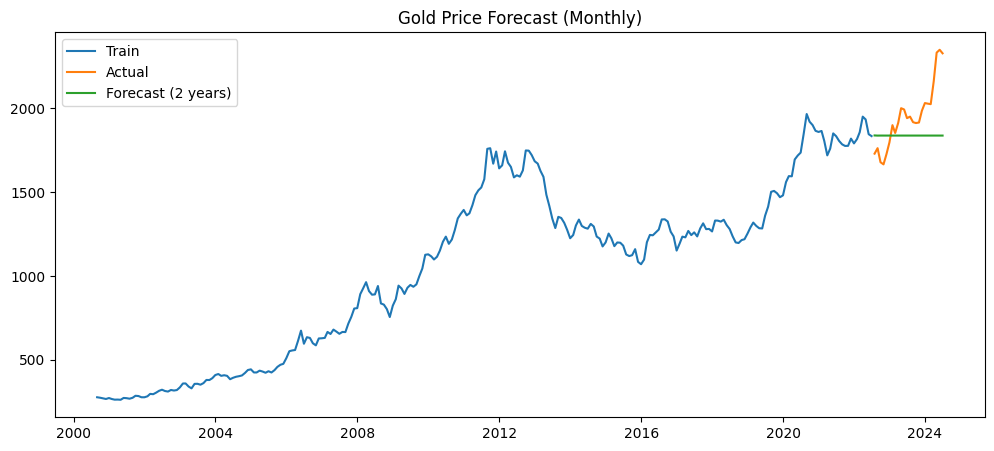

In [525]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast (2 years)')
plt.legend()
plt.title('Gold Price Forecast (Monthly)')
plt.show()


In [526]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)
print("MAE:", mae)


MAE: 172.08144248430105


----------